In [1]:
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import math
from functools import reduce
%matplotlib inline
np.random.seed(42)

In [2]:
def load():
    with open("mnist.pkl",'rb') as f:
        mnist = pickle.load(f)
    return mnist["training_images"], mnist["training_labels"], mnist["test_images"], mnist["test_labels"]

In [3]:
X_train, Y_train, X_test, Y_test = load()

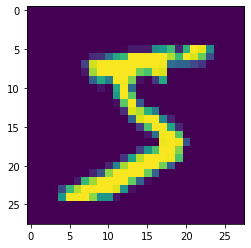

In [4]:
plt.imshow(X_train[0].reshape(28,28))

In [5]:
class FC:
    def __init__(self, in_channel, out_channel):
        self.W = {'val': np.random.standard_normal((in_channel,out_channel)), 'grad': 0}
        self.b = {'val': np.random.randn(out_channel), 'grad': 0}
        self.cache = None
    
    def forward(self, X):
        out = np.dot(X, self.W) + self.b
        self.cache = X
        return out
    
    def backward(self, dout):
        X = self.cache
        dX = np.dot(dout, self.W['val'].T).reshape(X.shape)
        self.W['grad'] = np.dot(X.reshape(X.shape[0], np.prod(X.shape[1:])).T, dout)
        self.b['grad'] = np.sum(dout, axis=0)
        self.update()
        return dX
    
    def update(self, lr=0.001):
        self.W['val'] -= lr*self.W['grad']
        self.b['val'] -= lr*self.b['grad']

In [12]:
class Conv2d:
    def __init__(self, in_channels, out_channels, kernel_size, stride=1):
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = (kernel_size,kernel_size,in_channels,out_channels)
        self.stride = stride
        self.cache = 0
        
        self.W = {'val': np.random.standard_normal((self.kernel_size)), 'grad': np.zeros(self.kernel_size)}
        self.b = {'val': np.random.standard_normal(out_channels), 'grad': np.zeros(out_channels)}
        
    def forward(self, x):
        (N,Cin,H,W) = x.shape
        self.input_shape = x.shape
        H_ = int((H - self.kernel_size[0]) / self.stride + 1)
        W_ = int((W - self.kernel_size[0]) / self.stride + 1)
        col_weights = self.W['val'].reshape([-1,self.out_channels])
        self.col_image = []
        conv_out = np.zeros((N,self.out_channels,H_,W_))
        for i in range(N):
            img_i = x[i]
            self.col_image_i = self.im2col(img_i,self.kernel_size[0],self.stride)
            print(self.col_image_i.shape)
            conv_out[i] = np.reshape(np.dot(self.col_image_i, col_weights) + self.b['val'],(H_,W_,-1)).transpose(2,0,1)
            self.col_image.append(self.col_image_i)
        self.col_image = np.array(self.col_image)
        return conv_out
    
    def backward(self, dout):
        (N,Cout,H_,W_) = dout.shape
        col_dout = dout.reshape((N,Cout,-1))
        for i in range(self.input_shape[0]):
            self.W['grad'] += np.dot(self.col_image[i].T, )
            
    def im2col(self, image, ksize, stride):
        # image is a 3d tensor([channel, height, width])
        image_col = []
        for i in range(0, image.shape[1] - ksize + 1, stride):
            for j in range(0, image.shape[2] - ksize + 1, stride):
                col = image[:,i:i + ksize, j:j + ksize].reshape([-1])
                image_col.append(col)
        image_col = np.array(image_col)
        return image_col

In [59]:
class MaxPool2d:
    def __init__(self, kernel_size=2, stride=2):
        self.kernel_size = kernel_size
        self.stride = stride
        self.mask = 0
    
    def forward(self, x):
        (N,Cin,H,W) = x.shape
        H_ = int(H/self.kernel_size)
        W_ = int(W/self.kernel_size)
        out = np.zeros((N, Cin, H_, W_))
        self.mask = np.zeros(x.shape)
        for n in range(N):
            for cin in range(Cin):
                for h in range(0, H, self.stride):
                    for w in range(0, W, self.stride):
                        out[n,cin,h//self.stride,w//self.stride] = np.max(x[n,cin,h:h + self.kernel_size, w:w + self.kernel_size])
                        i,j = np.unravel_index(np.argmax(x[n,cin,h:h + self.kernel_size, w:w + self.kernel_size]),(self.kernel_size,self.kernel_size))
                        self.mask[n,cin,i+h,j+w] = 1
        return out
    
    def backward(self,dout):
        return np.repeat(np.repeat(dout, self.stride, axis=2), self.stride, axis=3) * self.mask

In [ ]:
class Softmax():
    def __init__(self):
        self.cache = None
        
    def forward(self, x):
        

In [58]:
batch = X_train[0:2].reshape(2,1,28,28)

In [14]:
conv2d = Conv2d(1,6,5)
out = conv2d.forward(batch)
out.shape

(576, 25)
(576, 25)


(2, 6, 24, 24)

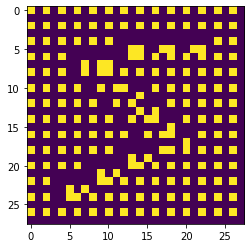

In [52]:
pool2d = MaxPool2d()
out = pool2d.forward(batch)
plt.imshow(pool2d.mask[0].reshape(28,28))

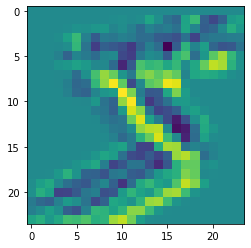

In [9]:
plt.imshow(out[0,0,:,:].reshape(24,24))